In [1]:
import numpy as np
import pandas as pd
import scipy as scp
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import datasets, model_selection, neighbors, metrics
%matplotlib inline

### Generate dataset

In [2]:
X, y = datasets.make_classification(n_samples=200,
                                    n_features=2,
                                    n_informative=2,
                                    n_redundant=0,
                                    n_classes=4,
                                    n_clusters_per_class=1,
                                    random_state=123
                                   )

In [3]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, train_size=0.7, random_state=321)

### Visualize dataset

In [4]:
colors_list = ['r', 'g', 'b', 'y']
colors = ListedColormap(colors_list)
light_colors = ListedColormap(['lightcoral', 'lightgreen', 'lightblue', 'lightyellow'])

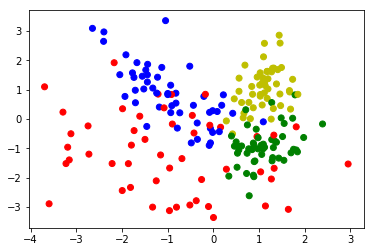

In [5]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=colors)

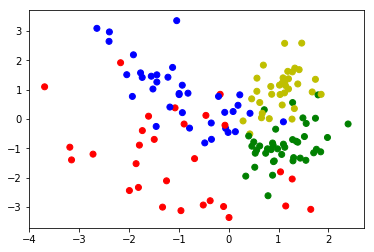

In [6]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=colors)

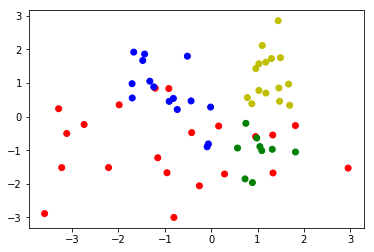

In [7]:
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=colors)

### Visualize decision surfaces

In [8]:
def get_meshgrid(data, step=.05, border=1.0,):
    x_min, x_max = data[:, 0].min() - border, data[:, 0].max() + border
    y_min, y_max = data[:, 1].min() - border, data[:, 1].max() + border
    return np.meshgrid(np.arange(x_min, x_max, step), np.arange(y_min, y_max, step))

In [9]:
def plot_decision_surface(estimator, train_data, train_labels, test_data, test_labels, 
                          colors = colors, light_colors = light_colors):
    #fit model
    estimator.fit(train_data, train_labels)
    
    #set figure size
    plt.figure(figsize = (16, 6))
    
    #plot decision surface on the train data 
    plt.subplot(1,2,1)
    xx, yy = get_meshgrid(train_data)
    mesh_predictions = np.array(estimator.predict(np.c_[xx.ravel(), yy.ravel()])).reshape(xx.shape)
    plt.pcolormesh(xx, yy, mesh_predictions, cmap = light_colors)
    plt.scatter(train_data[:, 0], train_data[:, 1], c = train_labels, s = 100, cmap = colors)
    plt.title('Train data, accuracy={:.2f}'.format(metrics.accuracy_score(train_labels, estimator.predict(train_data))))
    
    #plot decision surface on the test data
    plt.subplot(1,2,2)
    plt.pcolormesh(xx, yy, mesh_predictions, cmap = light_colors)
    plt.scatter(test_data[:, 0], test_data[:, 1], c = test_labels, s = 100, cmap = colors)
    plt.title('Test data, accuracy={:.2f}'.format(metrics.accuracy_score(test_labels, estimator.predict(test_data))))

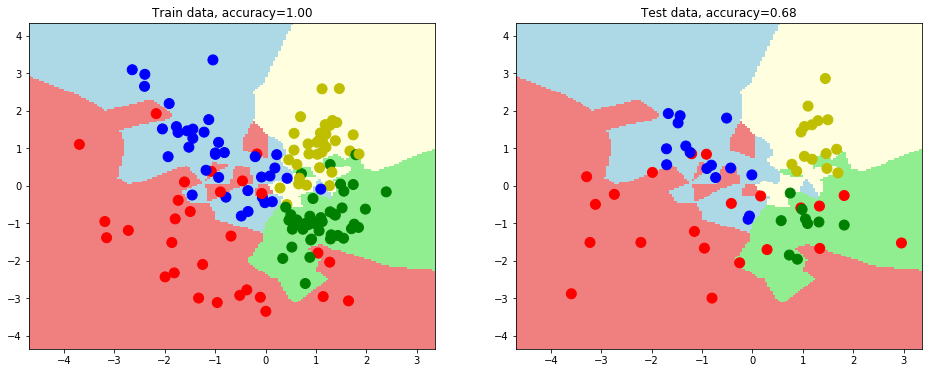

In [10]:
plot_decision_surface(neighbors.KNeighborsClassifier(n_neighbors=1), X_train, y_train, X_test, y_test)

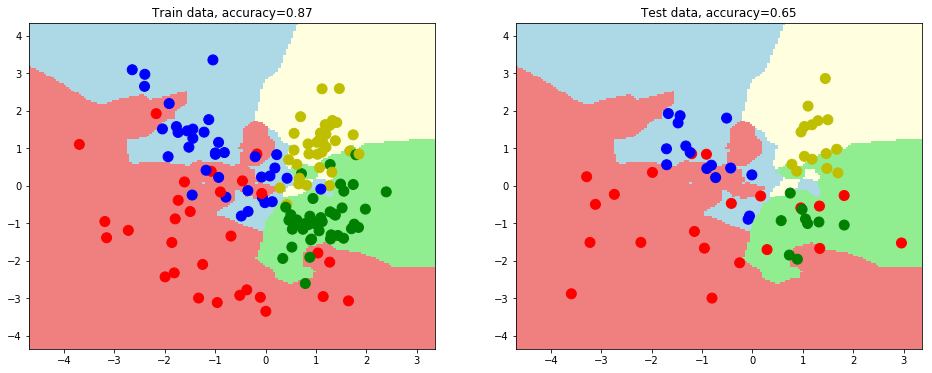

In [11]:
plot_decision_surface(neighbors.KNeighborsClassifier(n_neighbors=2), X_train, y_train, X_test, y_test)

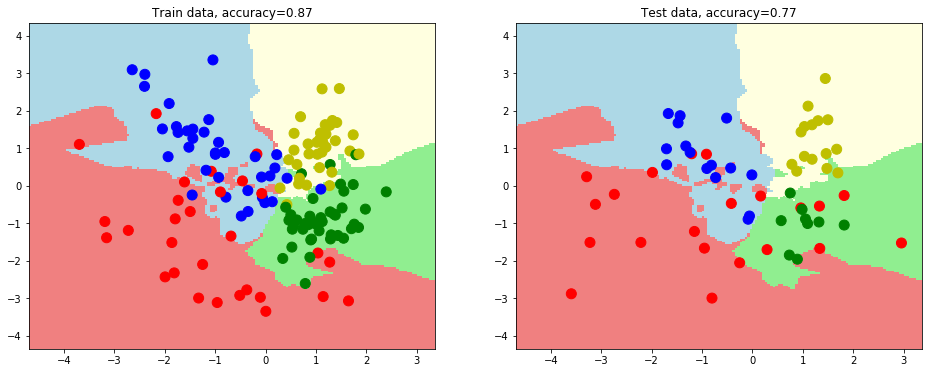

In [12]:
plot_decision_surface(neighbors.KNeighborsClassifier(n_neighbors=3), X_train, y_train, X_test, y_test)

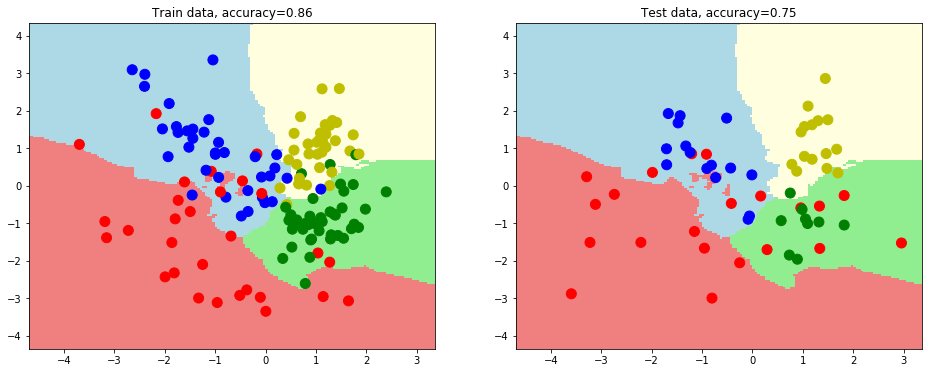

In [13]:
plot_decision_surface(neighbors.KNeighborsClassifier(n_neighbors=5), X_train, y_train, X_test, y_test)

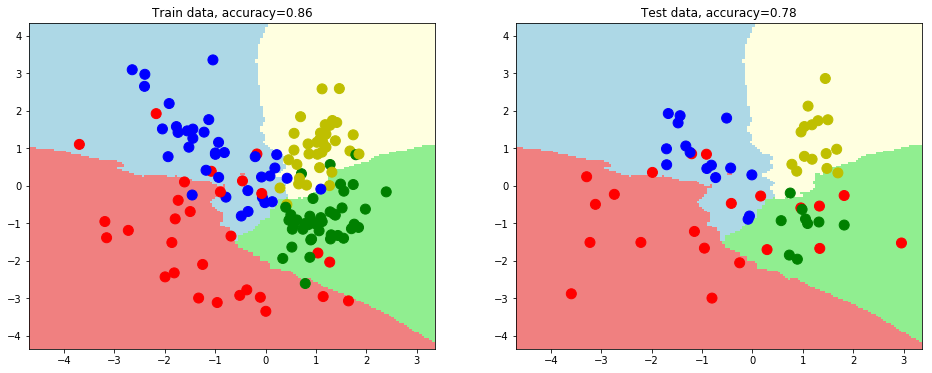

In [14]:
plot_decision_surface(neighbors.KNeighborsClassifier(n_neighbors=10), X_train, y_train, X_test, y_test)

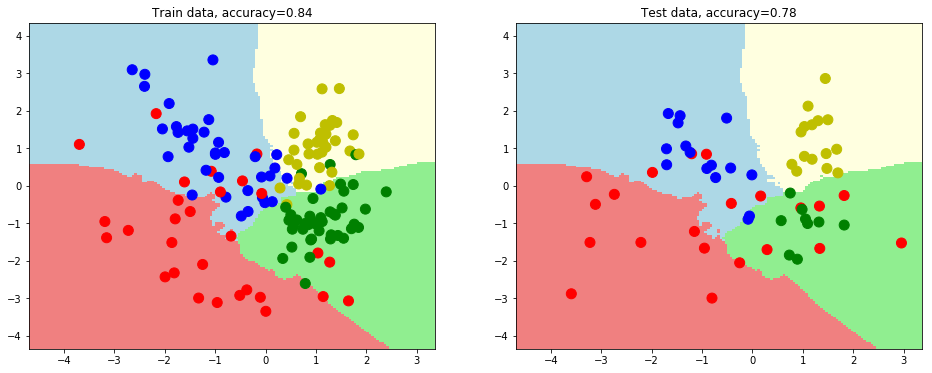

In [15]:
plot_decision_surface(neighbors.KNeighborsClassifier(n_neighbors=15), X_train, y_train, X_test, y_test)

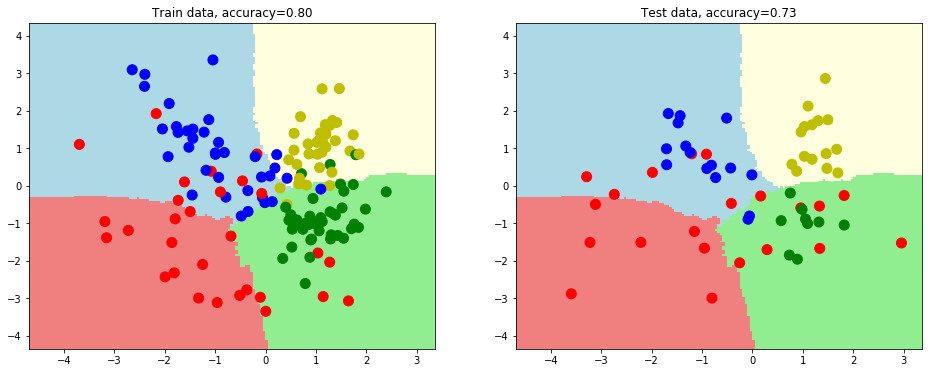

In [16]:
plot_decision_surface(neighbors.KNeighborsClassifier(n_neighbors=30), X_train, y_train, X_test, y_test)

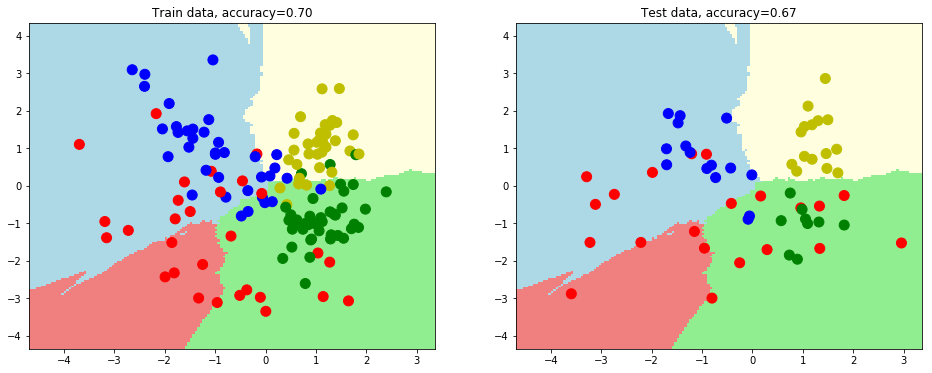

In [17]:
plot_decision_surface(neighbors.KNeighborsClassifier(n_neighbors=60), X_train, y_train, X_test, y_test)

In [18]:
# best k = 10, but even k = 3 is very good

### Choose $k$ using cross-validation

In [19]:
ks = range(1, 60)

In [20]:
scores = []

for k in ks:
    scores.append(np.mean(model_selection.cross_val_score(neighbors.KNeighborsClassifier(n_neighbors=k), X, y, cv=5)))

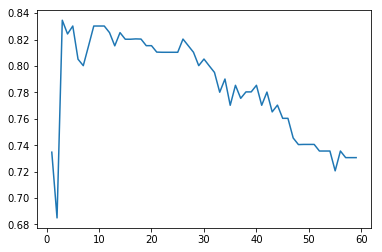

In [21]:
plt.plot(ks, scores)

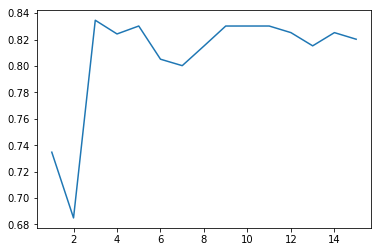

In [22]:
plt.plot(ks[:15], scores[:15])

In [23]:
k = ks[np.argmax(scores)]
k

3

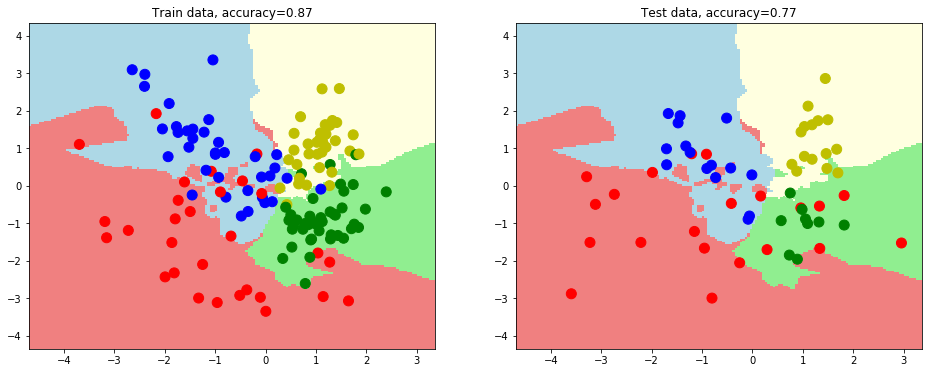

In [24]:
plot_decision_surface(neighbors.KNeighborsClassifier(n_neighbors=k), X_train, y_train, X_test, y_test)

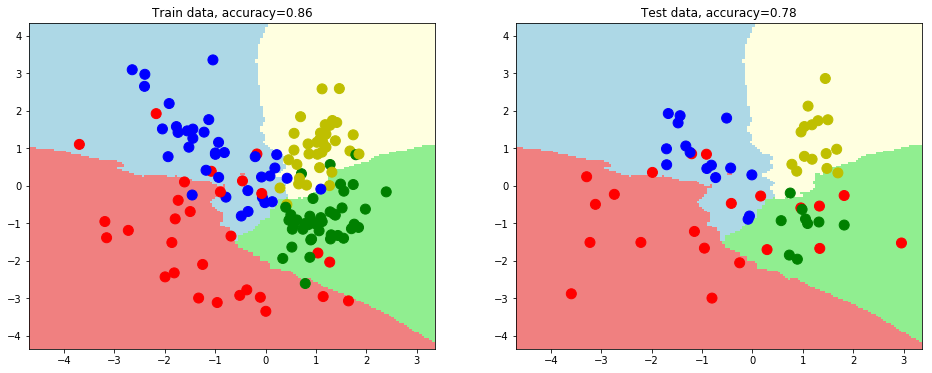

In [25]:
plot_decision_surface(neighbors.KNeighborsClassifier(n_neighbors=10), X_train, y_train, X_test, y_test)